In [1]:
# Custom dependencies
from FootballPlay import FootballPlay
from PreprocessTrackingData import PreprocessTrackingData
from scipy.spatial import Delaunay
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import pandas as pd
import matplotlib.animation as animation
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import sys

import pandas as pd
import numpy as np

pygame 2.5.2 (SDL 2.28.3, Python 3.8.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# Read in the data
tracking = pd.read_csv("data/tracking_week_4.csv")
plays = pd.read_csv("data/plays.csv")
players = pd.read_csv("data/players.csv")
colors = pd.read_csv("data/colors.csv")

In [3]:
# Select game and play
gameId = 2022100300
playId = 3939
nflId = 43321

In [4]:
# Define preprocessor
preprocessor = PreprocessTrackingData(tracking, 
                                      plays,
                                      players,
                                      colors,
                                      gameId, 
                                      playId
                                      )

In [7]:
df = preprocessor.triangulate()

In [8]:
def create_football_field(fig, ax, line_color='black', field_color='white'):
    plt.xlim(0, 120)
    plt.ylim(0, 53.3)

    for i in range(12):
        rect = patches.Rectangle((10*i, 0), 10, 53.3, linewidth=1, edgecolor=line_color, facecolor=field_color)
        ax.add_patch(rect)

    ax.tick_params(
        axis='both', 
        which='both', 
        direction='in', 
        pad=-40, 
        length=5, 
        bottom=True, 
        top=True, 
        labeltop=True, 
        labelbottom=True, 
        left=False, right=False, 
        labelleft=False, 
        labelright=False, 
        color=line_color
    )
    ax.set_xticks([i for i in range(10, 111)])
    label_set = []
    for i in range(1, 10):
        label_set += [" " for j in range(9)] + [str(i*10) if i <= 5 else str((10-i)*10)]
    label_set = [" "] + label_set + [" " for j in range(10)]
    ax.set_xticklabels(label_set, fontsize=20, color=line_color)
    return fig, ax

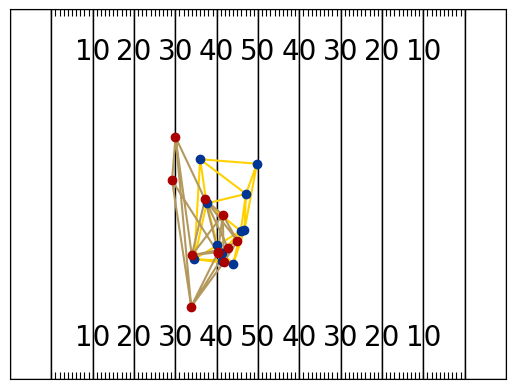

In [22]:
team1 = df[(df['club'] == 'LA') & (df['frameId'] == 40)]
team2 = df[(df['club'] == 'SF') & (df['frameId'] == 40)]

p1 = np.array(team1[['x','y']])

p2 = np.array(team2[['x','y']])

col1 = team1[['team_color','team_color2']].drop_duplicates()
col2 = team2[['team_color','team_color2']]


fig, ax = plt.subplots()
fig, ax = create_football_field(fig, ax)
ax.set_xlim(0, 120)
ax.set_ylim(0, 53.3)

tri = Delaunay(p1, furthest_site=False)
tri2 = Delaunay(p2, furthest_site=False)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.Delaunay.html

import matplotlib.pyplot as plt
plt.triplot(p1[:,0], p1[:,1], tri.simplices, color = col1['team_color2'].values[0])
plt.triplot(p2[:,0], p2[:,1], tri.simplices, color = col2['team_color2'].values[0])
plt.plot(p1[:,0], p1[:,1], 'o', color = col1['team_color'].values[0])
plt.plot(p2[:,0], p2[:,1], 'o', color = col2['team_color'].values[0])
plt.show()

In [ ]:
tri.

In [25]:
tri.neighbors

array([[11, -1,  4],
       [ 2, -1,  5],
       [ 3,  1,  6],
       [-1,  2,  8],
       [ 0, -1,  7],
       [ 1, 13,  6],
       [12,  2,  5],
       [10,  4,  9],
       [ 3, 12,  9],
       [ 7,  8, 10],
       [11,  7,  9],
       [-1,  0, 10],
       [ 8,  6, 13],
       [ 5, -1, 12]], dtype=int32)

In [10]:
tri.convex_hull

array([[0, 4],
       [9, 4],
       [9, 8],
       [2, 0],
       [2, 5],
       [5, 8]], dtype=int32)

In [11]:
tri.max_bound

array([58.25, 33.6 ])

In [12]:
tri.min_bound

array([44.65, 16.33])

In [13]:
tri.paraboloid_scale

0.02206989929249207

In [14]:
tri.paraboloid_shift

-51.530639290721545

In [15]:
tri.equations

array([[  0.7909914 ,   0.50041852,  -0.35201407, -45.89761263],
       [  0.82756316,   0.42020569,  -0.37224507, -45.07426877],
       [  0.53100742,   0.59217751,  -0.60609975, -34.34910221],
       [  0.83505332,   0.40505811,  -0.37230886, -45.08322215],
       [  0.84131   ,   0.38792071,  -0.37645053, -44.9749196 ],
       [  0.87395161,   0.24939715,  -0.41714464, -43.71094543],
       [  0.84313486,   0.35161208,  -0.40680776, -44.13227632],
       [  0.94021761,   0.23689936,  -0.24468253, -50.91668275],
       [  0.86723202,   0.35920824,  -0.34478698, -46.61680596],
       [  0.88481801,   0.28720725,  -0.36689112, -45.56263611],
       [  0.87822374,   0.30214888,  -0.37071432, -45.40730875],
       [  0.85760252,   0.34991227,  -0.37693412, -45.08690756],
       [  0.87830056,   0.28454457,  -0.38421675, -44.92617941],
       [  0.87101766,   0.29300507,  -0.39430478, -44.56195682]])

In [18]:
tri.

2